Epoch [100/1000], Loss: 22.1490
Epoch [200/1000], Loss: 4.6120
Epoch [300/1000], Loss: 0.6686
Epoch [400/1000], Loss: 0.1175
Epoch [500/1000], Loss: 0.0656
Epoch [600/1000], Loss: 0.0568
Epoch [700/1000], Loss: 0.0504
Epoch [800/1000], Loss: 0.0441
Epoch [900/1000], Loss: 0.0382
Epoch [1000/1000], Loss: 0.0326
Pesos aprendidos: 2.879589557647705
Bias aprendido: 1.4210208654403687
Predições: [4.300610542297363, 7.180200099945068, 10.059789657592773, 12.93937873840332, 15.818967819213867]
Gráfico:


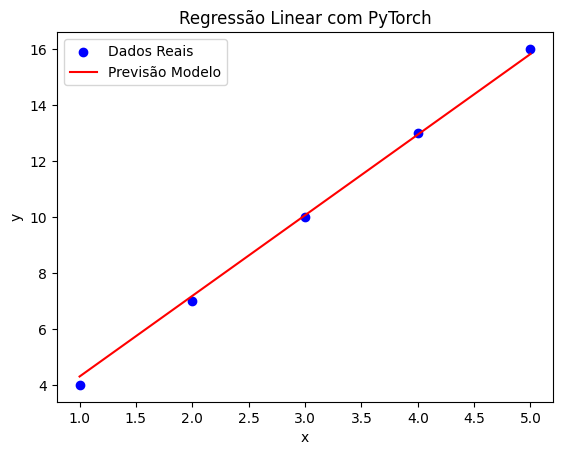

In [4]:
### Tópico 4 da AE1

# Regressão Linear

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Dados de exemplo (inputs e alvos)
# y= 3x +1
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
y_train = torch.tensor([[4.0], [7.0], [10.0], [13.0], [16.0]])

# Definir modelo de regressão linear
class Regressao_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = Regressao_Linear()

# Definir função de perda e otimizador
criterio = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinamento
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(x_train)
    loss = criterio(outputs, y_train)

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testar modelo
model.eval()
with torch.no_grad():
    predicted = model(x_train)

print("Pesos aprendidos:", model.linear.weight.item())
print("Bias aprendido:", model.linear.bias.item())
print("Predições:", predicted.squeeze().tolist())

print("Gráfico:")
plt.scatter(x_train.numpy(), y_train.numpy(), color='blue', label='Dados Reais')
plt.plot(x_train.numpy(), predicted.numpy(), color='red', label='Previsão Modelo')
plt.title('Regressão Linear com PyTorch')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Epoch [100/1000], Loss: 0.0116
Epoch [200/1000], Loss: 0.0014
Epoch [300/1000], Loss: 0.0003
Epoch [400/1000], Loss: 0.0001
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0007
Gráfico:


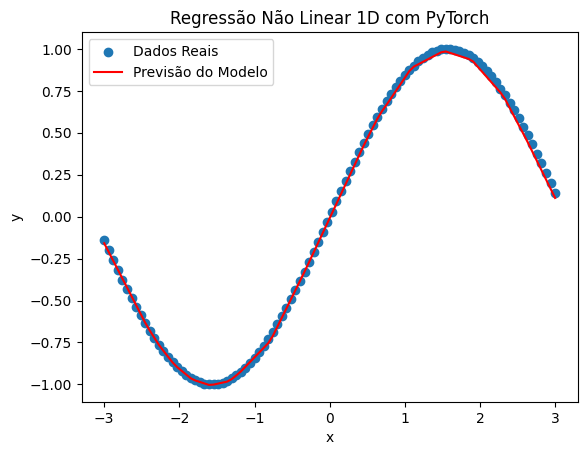

In [6]:
# Regressão não linear (1D)

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Dados de exemplo (x e y com relação não linear)
x_train = torch.linspace(-3, 3, 100).unsqueeze(1)
y_train = torch.sin(x_train)   # y = sin(x)

# Definição da rede neural (com 1 camada oculta com 32 Neurônios)
class Regressao_nao_linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 32) # 32 neurônios
        self.relu = nn.ReLU() # Utilizei a função de ativação ReLU
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

model = Regressao_nao_linear()

# Função de perda e otimizador
criterio = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinamento
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    outputs = model(x_train)
    loss = criterio(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Gráficos
print('Gráfico:')
model.eval()
with torch.no_grad():
    predicted = model(x_train)

plt.scatter(x_train.numpy(), y_train.numpy(), label='Dados Reais')
plt.plot(x_train.numpy(), predicted.numpy(), color='red', label='Previsão do Modelo')
plt.title('Regressão Não Linear 1D com PyTorch')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()